In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LEVELS = ['1', '2', '3_1', '3_2', '3_3', '3_4']

In [3]:
output_df = pd.read_csv('./hatebert/hateBERT_test_preds_hierachical-losses.csv')
output_df = output_df.drop(columns=['tokens'])
output_df.set_index('rewire_id', inplace=True)

output_df.head()

,text,label_1,label_2,label_3,label_3_1,label_3_2,label_3_3,label_3_4,pred_1,pred_2,pred_3_1,pred_3_2,pred_3_3,pred_3_4
rewire_id,,,,,,,,,,,,,,
sexism2022_english-9019,"This year, Justin Timberlake should perform in...",not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist
sexism2022_english-8150,"Osaka won youth beat old age, 20 vs 37. Serena...",sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",other,other,"3.1 casual use of gendered slurs, profanities,...",other,sexist,3. animosity,other,other,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-18136,Yeah the only way a man can satisfy those wome...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm,1.2 incitement and encouragement of harm,other,other,other,sexist,"1. threats, plans to harm and incitement",1.1 threats of harm,other,other,other
sexism2022_english-2602,Young girl 'passed around' to sleep with 100 m...,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist
sexism2022_english-1479,You are an inspiration brother. I follow you o...,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist,not sexist


# Predicted - Golden labels confusion matrix

In [4]:
pg_pivot_tables = []

for level in LEVELS:
    level_tables = []
    for level2 in LEVELS:
        level_tables.append(output_df.pivot_table(index=f'pred_{level}', columns=f'label_{level2}', aggfunc='size', fill_value=0))
    pg_pivot_tables.append(level_tables)

pg_pivot_tables[0][1]

label_2,"1. threats, plans to harm and incitement",2. derogation,3. animosity,4. prejudiced discussions,not sexist
pred_1,,,,,
not sexist,34,131,92,56,2821
sexist,55,323,241,38,209


In [5]:
pg_pivot_tables[0][0]

label_1,not sexist,sexist
pred_1,,
not sexist,2821,313
sexist,209,657


In [6]:
# joint all pivot tables into one, with multiindex
# joint_pivot_table = pd.concat([pd.concat(level_tables, keys=LEVELS) for level_tables in pivot_tables], keys=LEVELS, axis=1)
pg_joint_pivot_table = pd.concat([pd.concat(level_tables, keys=LEVELS, axis=1) for level_tables in pg_pivot_tables], keys=LEVELS, axis=0)
pg_joint_pivot_table = pg_joint_pivot_table.sort_index(axis=1)
pg_joint_pivot_table = pg_joint_pivot_table.sort_index(axis=0)
pg_joint_pivot_table = pg_joint_pivot_table.rename_axis(['level', 'pred_labels'], axis=0)
pg_joint_pivot_table = pg_joint_pivot_table.rename_axis(['level', 'golden_labels'], axis=1)

pg_joint_pivot_table = pg_joint_pivot_table.fillna(0).astype(int)

pg_joint_pivot_table

level                                                             1         \
golden_labels                                            not sexist sexist   
level pred_labels                                                            
1     not sexist                                               2821    313   
      sexist                                                    209    657   
2     1. threats, plans to harm and incitement                   37     61   
      2. derogation                                              88    314   
      3. animosity                                              126    297   
      4. prejudiced discussions                                  58     53   
      not sexist                                               2721    245   
3_1   1.1 threats of harm                                        17     21   
      1.2 incitement and encouragement of harm                   31     59   
      not sexist                                               2784    280   
      other                                                     198    610   
3_2   2.1 descriptive attacks                                    85    193   
      2.2 aggressive and emotive attacks                         23    220   
      2.3 dehumanising attacks & overt sexual objecti...         44     45   
      not sexist                                               2763    268   
      other                                                     115    244   
3_3   3.1 casual use of gendered slurs, profanities, ...         23    216   
      3.2 immutable gender differences and gender ste...        109    143   
      3.3 backhanded gendered compliments                        26     16   
      3.4 condescending explanations or unwelcome advice         40     34   
      not sexist                                               2716    250   
      other                                                     116    311   
3_4   4.1 supporting mistreatment of individual women            47     30   
      4.2 supporting systemic discrimination against ...         38     53   
      not sexist                                               2755    268   
      other                                                     190    619   

level                                                                                           2  \
golden_labels                                            1. threats, plans to harm and incitement   
level pred_labels                                                                                   
1     not sexist                                                                               34   
      sexist                                                                                   55   
2     1. threats, plans to harm and incitement                                                 47   
      2. derogation                                                                            11   
      3. animosity                                                                              5   
      4. prejudiced discussions                                                                 5   
      not sexist                                                                               21   
3_1   1.1 threats of harm                                                                      13   
      1.2 incitement and encouragement of harm                                                 41   
      not sexist                                                                               23   
      other                                                                                    12   
3_2   2.1 descriptive attacks                                                                   2   
      2.2 aggressive and emotive attacks                                                       17   
      2.3 dehumanising attacks & overt sexual objecti...                                        5   
      not sexist    

In [7]:
pg_joint_pivot_table.to_csv('./hatebert/hateBERT_test_preds_hierachical-losses_pivot-table.csv')

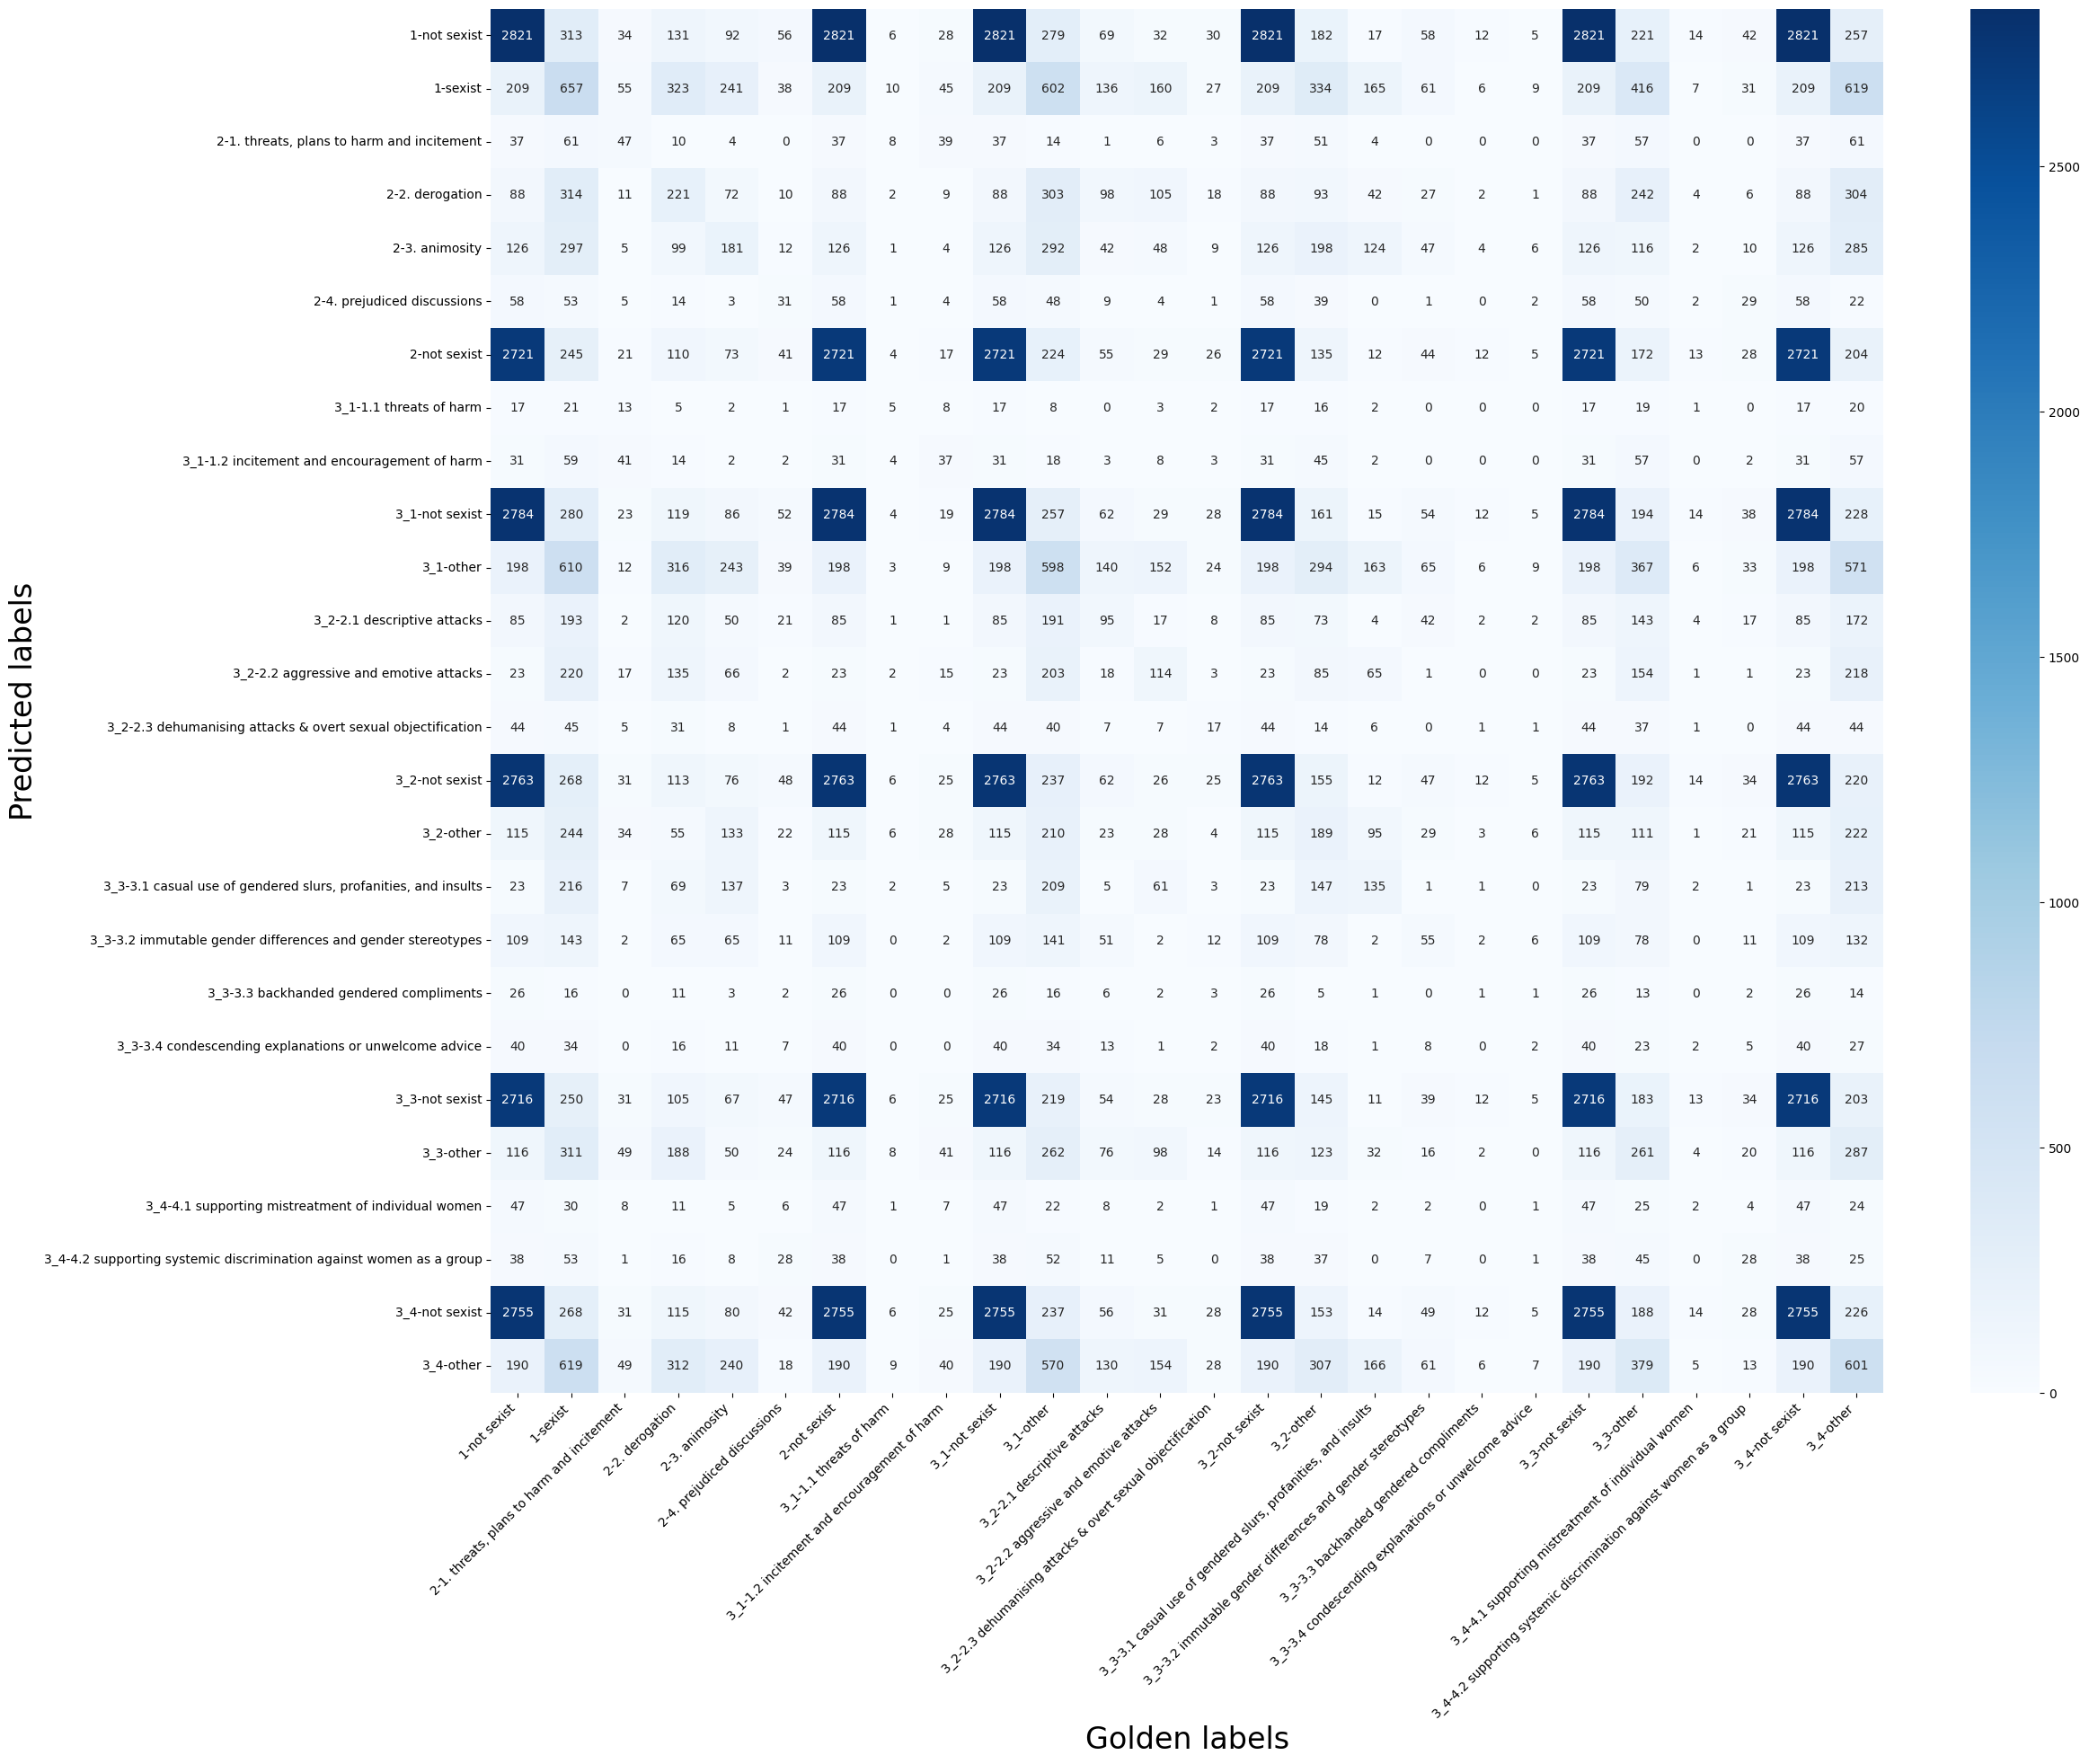

In [8]:
# heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(pg_joint_pivot_table, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted labels', fontsize=24)
plt.xlabel('Golden labels', fontsize=24)
plt.xticks(rotation=45, ha='right')

plt.savefig('./hatebert/hateBERT_test_preds_hierachical-losses_pivot-table.png', bbox_inches='tight')

plt.show()

In [9]:
pg_pivot_tables_norm = []

for level in LEVELS:
    level_tables = []
    for level2 in LEVELS:
        level_tables.append(output_df.pivot_table(index=f'pred_{level}', columns=f'label_{level2}', aggfunc='size', fill_value=0).apply(lambda x: x/x.sum(), axis=1))
    pg_pivot_tables_norm.append(level_tables)

pg_pivot_tables_norm[0][0]

label_1,not sexist,sexist
pred_1,,
not sexist,0.900128,0.099872
sexist,0.241339,0.758661


In [10]:
pg_joint_pivot_table_norm = pd.concat([pd.concat(level_tables, keys=LEVELS, axis=1) for level_tables in pg_pivot_tables_norm], keys=LEVELS, axis=0)
pg_joint_pivot_table_norm = pg_joint_pivot_table_norm.sort_index(axis=1)
pg_joint_pivot_table_norm = pg_joint_pivot_table_norm.sort_index(axis=0)
pg_joint_pivot_table_norm = pg_joint_pivot_table_norm.rename_axis(['level', 'pred_labels'], axis=0)
pg_joint_pivot_table_norm = pg_joint_pivot_table_norm.rename_axis(['level', 'golden_labels'], axis=1)

pg_joint_pivot_table_norm

level                                                             1            \
golden_labels                                            not sexist    sexist   
level pred_labels                                                               
1     not sexist                                           0.900128  0.099872   
      sexist                                               0.241339  0.758661   
2     1. threats, plans to harm and incitement             0.377551  0.622449   
      2. derogation                                        0.218905  0.781095   
      3. animosity                                         0.297872  0.702128   
      4. prejudiced discussions                            0.522523  0.477477   
      not sexist                                           0.917397  0.082603   
3_1   1.1 threats of harm                                  0.447368  0.552632   
      1.2 incitement and encouragement of harm             0.344444  0.655556   
      not sexist                                           0.908616  0.091384   
      other                                                0.245050  0.754950   
3_2   2.1 descriptive attacks                              0.305755  0.694245   
      2.2 aggressive and emotive attacks                   0.094650  0.905350   
      2.3 dehumanising attacks & overt sexual objecti...   0.494382  0.505618   
      not sexist                                           0.911580  0.088420   
      other                                                0.320334  0.679666   
3_3   3.1 casual use of gendered slurs, profanities, ...   0.096234  0.903766   
      3.2 immutable gender differences and gender ste...   0.432540  0.567460   
      3.3 backhanded gendered compliments                  0.619048  0.380952   
      3.4 condescending explanations or unwelcome advice   0.540541  0.459459   
      not sexist                                           0.915711  0.084289   
      other                                                0.271663  0.728337   
3_4   4.1 supporting mistreatment of individual women      0.610390  0.389610   
      4.2 supporting systemic discrimination against ...   0.417582  0.582418   
      not sexist                                           0.911346  0.088654   
      other                                                0.234858  0.765142   

level                                                                                           2  \
golden_labels                                            1. threats, plans to harm and incitement   
level pred_labels                                                                                   
1     not sexist                                                                         0.010849   
      sexist                                                                             0.063510   
2     1. threats, plans to harm and incitement                                           0.479592   
      2. derogation                                                                      0.027363   
      3. animosity                                                                       0.011820   
      4. prejudiced discussions                                                          0.045045   
      not sexist                                                                         0.007080   
3_1   1.1 threats of harm                                                                0.342105   
      1.2 incitement and encouragement of harm                                           0.455556   
      not sexist                                                                         0.007507   
      other                                                                              0.014851   
3_2   2.1 descriptive attacks                                                            0.007194   
      2.2 aggressive and emotive attacks                                                 0.069959   
      2.3 dehumanising attacks & o

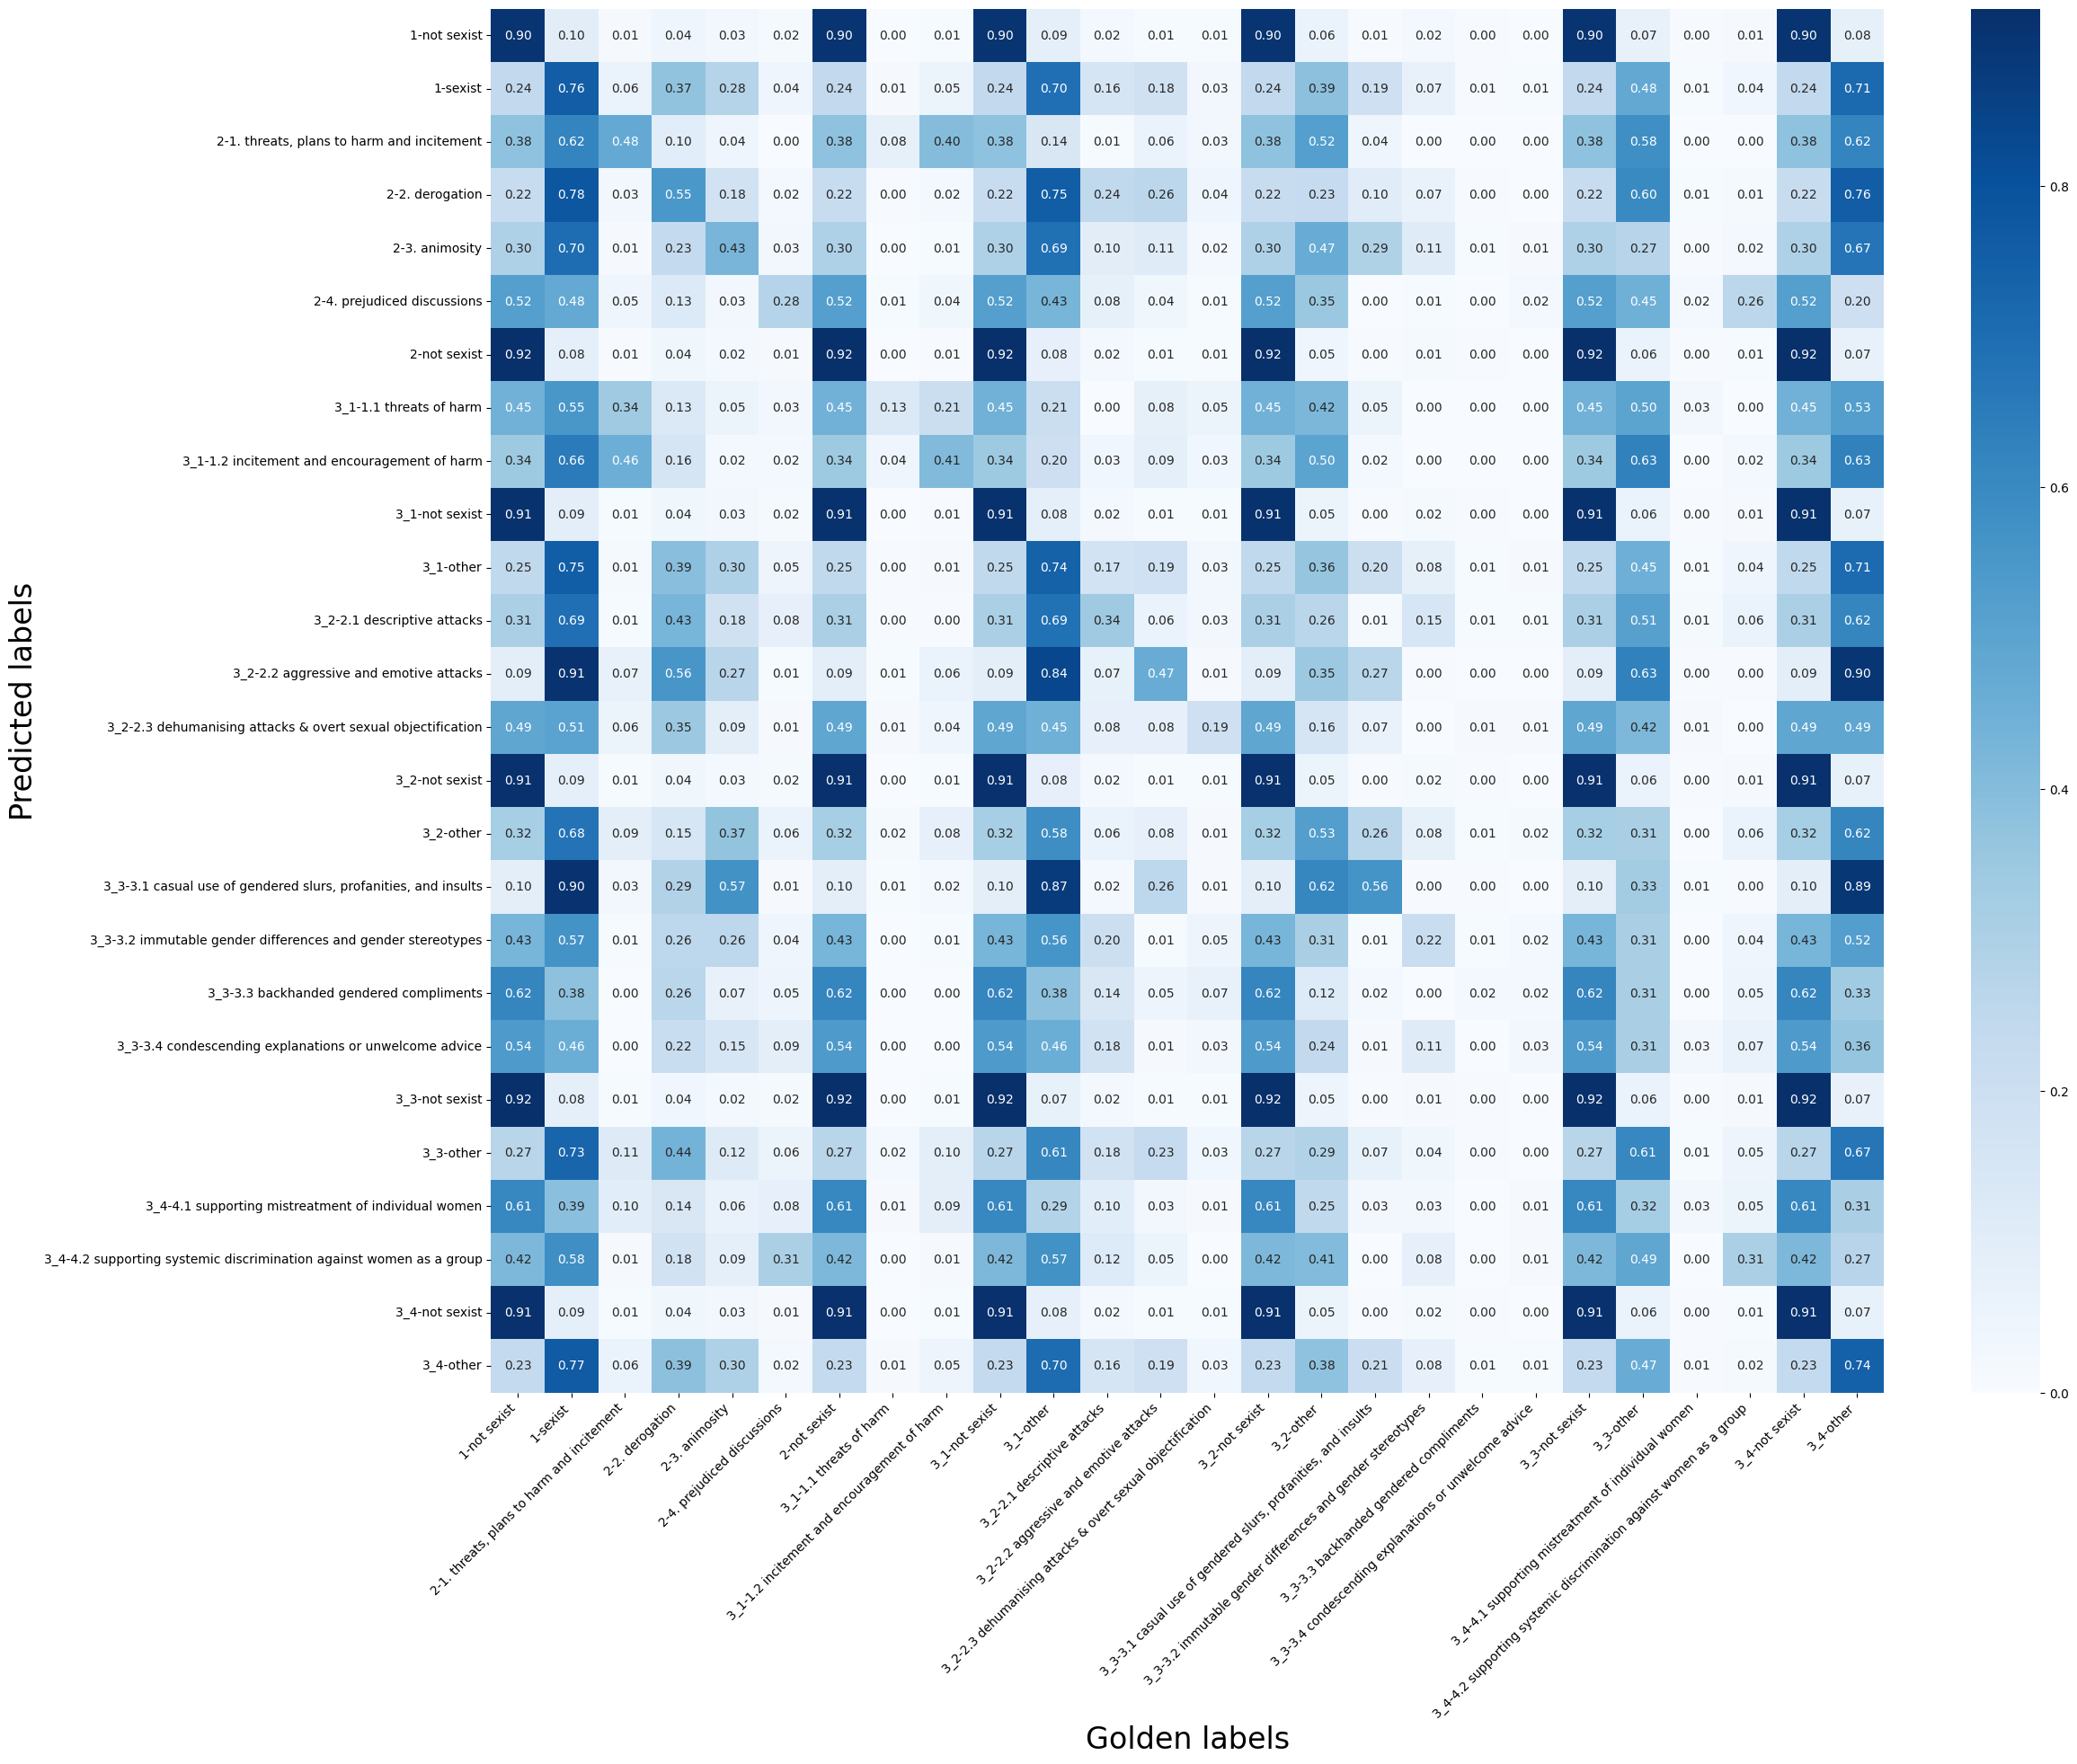

In [11]:
# heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(pg_joint_pivot_table_norm, annot=True, fmt='.2f', cmap='Blues')

plt.ylabel('Predicted labels', fontsize=24)
plt.xlabel('Golden labels', fontsize=24)
plt.xticks(rotation=45, ha='right')

# plt.savefig('./bertweet/bertweet-base_pred-gold_confusion_matrix_norm.png', bbox_inches='tight')
plt.savefig('./hatebert/hateBERT_test_preds_hierachical-losses_pivot-table_norm.png', bbox_inches='tight')

plt.show()

# Predicted - Predicted labels confusion matrix

In [12]:
pp_pivot_tables = []

for level in LEVELS:
    level_tables = []
    for level2 in LEVELS:
        level_tables.append(output_df.pivot_table(index=f'pred_{level}', columns=f'pred_{level2}', aggfunc='size', fill_value=0))
    pp_pivot_tables.append(level_tables)

pp_pivot_tables[0][1]

pred_2,"1. threats, plans to harm and incitement",2. derogation,3. animosity,4. prejudiced discussions,not sexist
pred_1,,,,,
not sexist,23,16,83,47,2965
sexist,75,386,340,64,1


In [13]:
pp_pivot_tables[0][0]

pred_1,not sexist,sexist
pred_1,,
not sexist,3134,0
sexist,0,866


In [14]:
joint_pivot_table_pp = pd.concat([pd.concat(level_tables, keys=LEVELS, axis=1) for level_tables in pp_pivot_tables], keys=LEVELS, axis=0)
joint_pivot_table_pp = joint_pivot_table_pp.sort_index(axis=1)
joint_pivot_table_pp = joint_pivot_table_pp.sort_index(axis=0)
joint_pivot_table_pp = joint_pivot_table_pp.rename_axis(['level', 'pred_labels'], axis=0)
joint_pivot_table_pp = joint_pivot_table_pp.rename_axis(['level', 'pred_labels'], axis=1)

joint_pivot_table_pp = joint_pivot_table_pp.fillna(0).astype(int)

joint_pivot_table_pp

level                                                             1         \
pred_labels                                              not sexist sexist   
level pred_labels                                                            
1     not sexist                                               3134      0   
      sexist                                                      0    866   
2     1. threats, plans to harm and incitement                   23     75   
      2. derogation                                              16    386   
      3. animosity                                               83    340   
      4. prejudiced discussions                                  47     64   
      not sexist                                               2965      1   
3_1   1.1 threats of harm                                        17     21   
      1.2 incitement and encouragement of harm                   16     74   
      not sexist                                               3064      0   
      other                                                      37    771   
3_2   2.1 descriptive attacks                                    17    261   
      2.2 aggressive and emotive attacks                          3    240   
      2.3 dehumanising attacks & overt sexual objecti...         29     60   
      not sexist                                               3030      1   
      other                                                      55    304   
3_3   3.1 casual use of gendered slurs, profanities, ...         14    225   
      3.2 immutable gender differences and gender ste...         78    174   
      3.3 backhanded gendered compliments                        18     24   
      3.4 condescending explanations or unwelcome advice         35     39   
      not sexist                                               2965      1   
      other                                                      24    403   
3_4   4.1 supporting mistreatment of individual women            37     40   
      4.2 supporting systemic discrimination against ...         30     61   
      not sexist                                               3022      1   
      other                                                      45    764   

level                                                                                           2  \
pred_labels                                              1. threats, plans to harm and incitement   
level pred_labels                                                                                   
1     not sexist                                                                               23   
      sexist                                                                                   75   
2     1. threats, plans to harm and incitement                                                 98   
      2. derogation                                                                             0   
      3. animosity                                                                              0   
      4. prejudiced discussions                                                                 0   
      not sexist                                                                                0   
3_1   1.1 threats of harm                                                                      30   
      1.2 incitement and encouragement of harm                                                 68   
      not sexist                                                                                0   
      other                                                                                     0   
3_2   2.1 descriptive attacks                                                                   0   
      2.2 aggressive and emotive attacks                                                       16   
      2.3 dehumanising attacks & overt sexual objecti...                                       11   
      not sexist    

In [15]:
# joint_pivot_table_pp.to_csv('./bertweet/bertweet-base_pred-pred_confusion_matrix.csv')
joint_pivot_table_pp.to_csv('./hatebert/hateBERT_test_preds_hierachical-losses_pred-pred_confusion_matrix.csv')

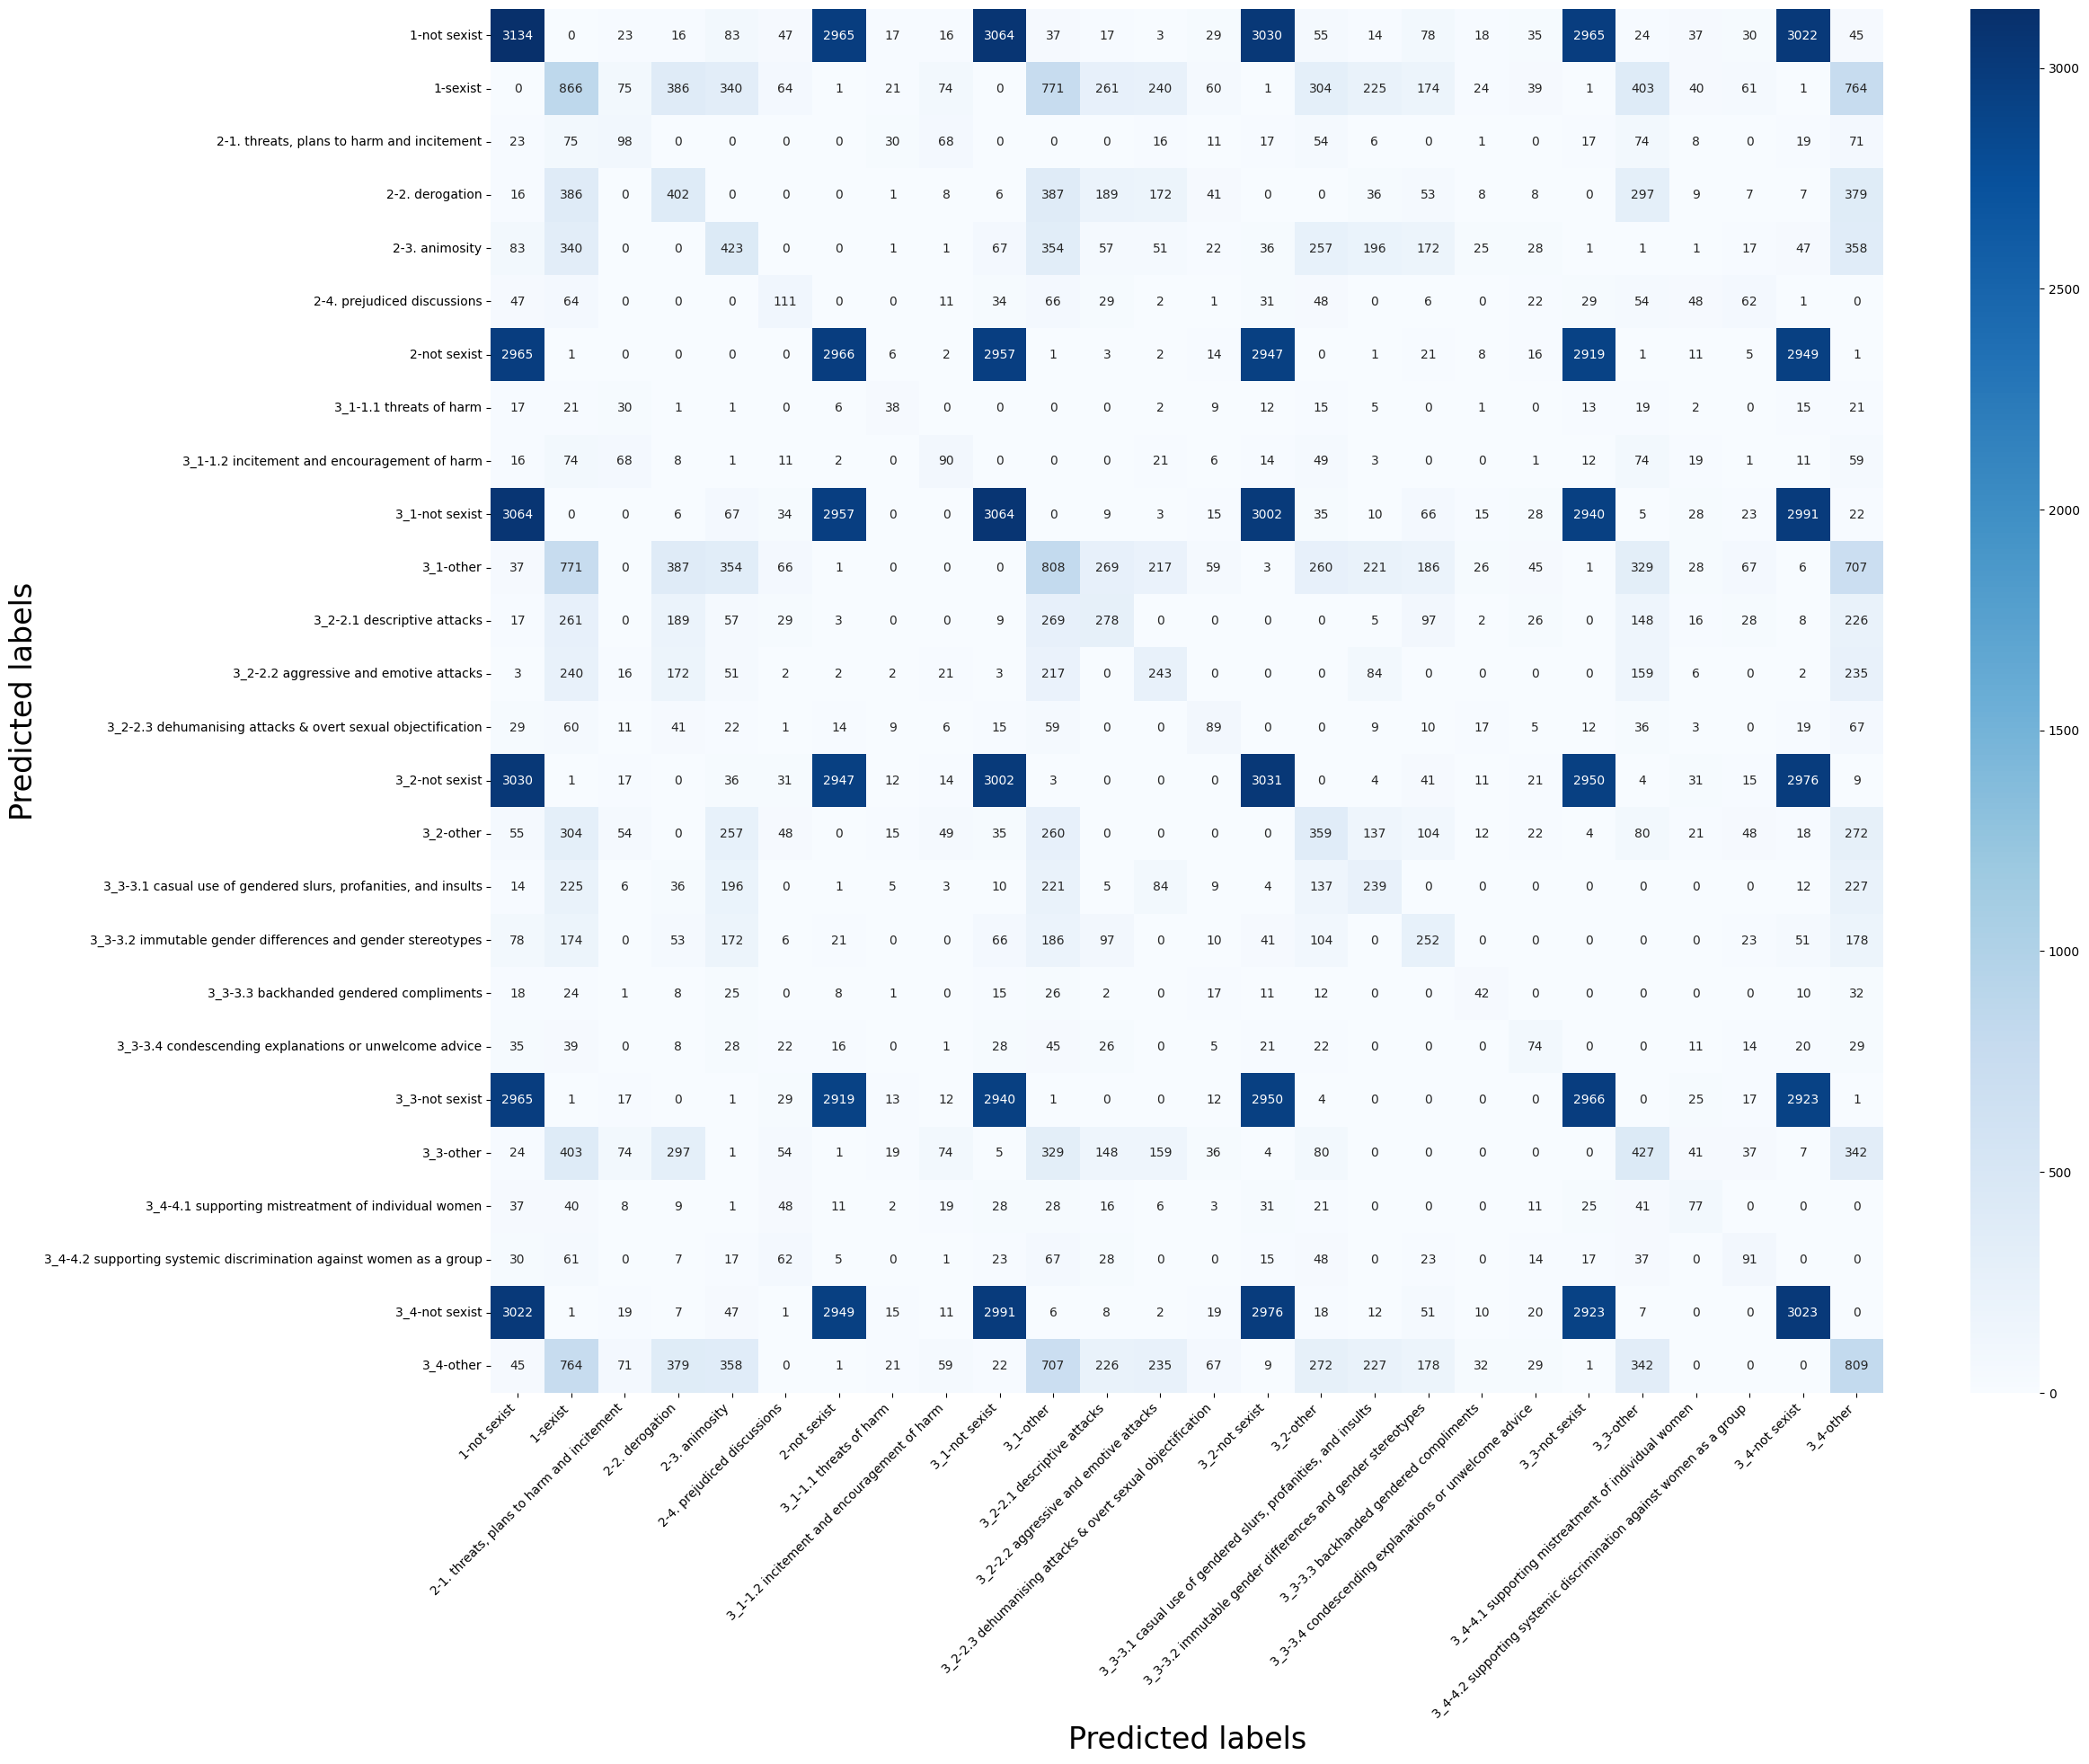

In [16]:
# heatmap

plt.figure(figsize=(25, 20))
sns.heatmap(joint_pivot_table_pp, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted labels', fontsize=24)
plt.xlabel('Predicted labels', fontsize=24)
plt.xticks(rotation=45, ha='right')

# plt.savefig('./bertweet/bertweet-base_pred-pred_confusion_matrix.png', bbox_inches='tight')
plt.savefig('./hatebert/hateBERT_test_preds_hierachical-losses_pred-pred_confusion_matrix.png', bbox_inches='tight')

plt.show()

In [17]:
output_df[(output_df['pred_3_2'] == '2.2 aggressive and emotive attacks') & 
          (output_df['pred_3_3'] == '3.1 casual use of gendered slurs, profanities, and insults')]

,text,label_1,label_2,label_3,label_3_1,label_3_2,label_3_3,label_3_4,pred_1,pred_2,pred_3_1,pred_3_2,pred_3_3,pred_3_4
rewire_id,,,,,,,,,,,,,,
sexism2022_english-12255,Please. Whip out your white chad jawline and y...,sexist,2. derogation,2.2 aggressive and emotive attacks,other,2.2 aggressive and emotive attacks,other,other,sexist,3. animosity,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-12812,"Yes, child grooming for sexual purposes is ill...",sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",other,other,"3.1 casual use of gendered slurs, profanities,...",other,sexist,3. animosity,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-7093,same mainstream trash you do You basically adm...,sexist,2. derogation,2.2 aggressive and emotive attacks,other,2.2 aggressive and emotive attacks,other,other,sexist,2. derogation,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-949,LOL that fat girl .... black men cant catch up...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,...",other,other,"3.1 casual use of gendered slurs, profanities,...",other,sexist,3. animosity,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-6237,Many Instagram models in Indonesia are whore. ...,sexist,2. derogation,2.2 aggressive and emotive attacks,other,2.2 aggressive and emotive attacks,other,other,sexist,2. derogation,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sexism2022_english-7111,You know this bitch is gonna keep anything she...,sexist,2. derogation,2.2 aggressive and emotive attacks,other,2.2 aggressive and emotive attacks,other,other,sexist,2. derogation,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-10456,She gets a bad rap because it's pretty obvious...,sexist,2. derogation,2.2 aggressive and emotive attacks,other,2.2 aggressive and emotive attacks,other,other,sexist,3. animosity,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
sexism2022_english-15286,This socialist cunt will soon be sucking on th...,sexist,2. derogation,2.2 aggressive and emotive attacks,other,2.2 aggressive and emotive attacks,other,other,sexist,3. animosity,other,2.2 aggressive and emotive attacks,"3.1 casual use of gendered slurs, profanities,...",other
